In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from scTools import input, preprocess, process
#import cello
import os
import anndata as ad
from anndata import AnnData

In [118]:
#Load files
subsample = None
onMac=False

whichTreatment = 1

treatment = ['NonfatVehicle', 'FriedVehicle', 'FriedCRV431', 'FriedLANI', 'FriedCRVLAN']
if onMac:
    pathPrefix='clusteringResults/'
else:
    pathPrefix = '/media/pmayo/Disc4/scRNA-seq_Gallay2020/clusteringResults/'

adata = (sc.read_h5ad(pathPrefix + treatment[whichTreatment] +'.h5ad'))
adata.uns['log1p']["base"] = None

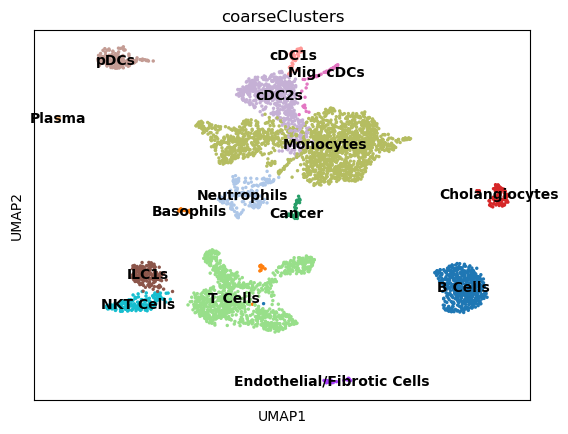

In [119]:
#key='macroClusters'
key='coarseClusters'
sc.pl.umap(adata, color=[key], legend_loc='on data')
#sc.pl.umap(adata, legend_loc='on data', save='_blank_FriedmanVehicle')
#sc.pl.umap(adata, color=['leiden'], legend_loc=None, title='', save='_color_FriedmanVehicle')

In [120]:
LymphoidCells = ['B Cells', 'pDCs', 'NK Cells', 'NKT Cells', 
                 'T Cells', 'T Cells1', 'T Cell2', 'T Cells3', 'y-delta T Cells',
                'ILC1s', 'NK/ILC1s', 'Basophils']
MyeloidCells = ['cDC1s', 'cDC2s', 'Mig. cDCs', 'Kupffer Cells', 'Monocytes',
               'Monocytes1', 'Monocytes2', 'Monocytes3', 'Monocytes4', 
               'Macrophage/Monocyte', 'Macrophages', 'cDC1s?', 'Myeloid Cells']
CD45s = ['Cholangiocytes', 'Hepatocytes', 'Stellate Cells', 'Fibroblasts',
        'Endothelial Cells', 'Endothelial/Fibrotic Cells']

key='macroClusters'
#for adata in adataList:
#    adata.obs['macroClusters'] = adata.obs['coarseClusters']
#    process.replaceClusters('Myeloid Cells', MyeloidCells, adata, key=key)
#    process.replaceClusters('Lymphoid Cells', LymphoidCells, adata, key=key)
#    process.replaceClusters('CD45s', CD45s, adata, key=key)
#    print(np.unique(adata.obs[key]))


In [186]:
print(np.unique(adata.obs['macroClusters']))
adata.obs['Lymph'] = [True if x in LymphoidCells else False for x in adata.obs['coarseClusters']]
adata.obs['Myeloid'] = [True if x in MyeloidCells else False for x in adata.obs['coarseClusters']]
adata.obs['CD45'] = [True if x in CD45s else False for x in adata.obs['coarseClusters']]

#lymphAdata = adata[adata.obs['macroClusters']=='Lymphoid Cells']
lymphAdata = adata[adata.obs['coarseClusters'].isin(LymphoidCells)]
#myeloidAdata = adata[adata.obs['macroClusters']=='Myeloid Cells']
myeloidAdata = adata[adata.obs['coarseClusters'].isin(MyeloidCells)]
CD45Adata = adata[adata.obs['coarseClusters'].isin(CD45s)]
NK_ILCAdata = adata[adata.obs['coarseClusters']=='NK/ILC1s']

fineData = CD45Adata
print(np.unique(fineData.obs['coarseClusters']))

['Basophils' 'CD45s' 'Cancer' 'Lymphoid Cells' 'Myeloid Cells'
 'Neutrophils' 'Plasma']
['Cholangiocytes' 'Endothelial/Fibrotic Cells']


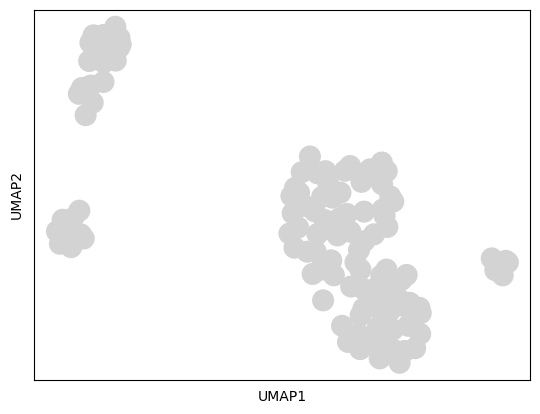

In [187]:

#sc.pp.neighbors(lymphAdata, n_neighbors=15, n_pcs=40)
#sc.tl.umap(lymphAdata)
preprocess.umapify(fineData)

#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

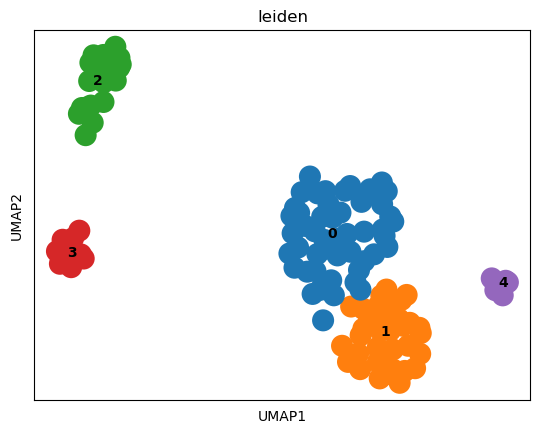

In [189]:
sc.tl.leiden(fineData, resolution=0.6)
sc.pl.umap(fineData, color=['leiden'], legend_loc='on data')
sc.tl.rank_genes_groups(fineData, 'leiden', method='logreg', max_iter=2000)


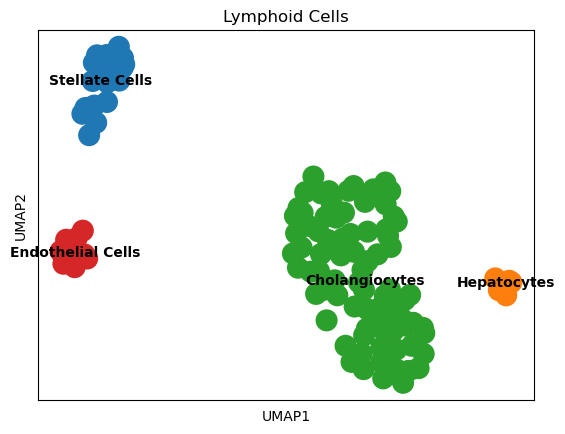

In [198]:
#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

#leiden = lymphAdata.obs['leiden'].map({x:('Other' if x=='9' else x) for x in lymphAdata.obs['leiden']})
#lymphAdata.obs['leiden'] = leiden

sc.pl.umap(fineData, color=['leiden'], title='Lymphoid Cells', legend_loc='on data')


In [197]:
process.replaceClusters('Hepatocytes', ['4'], fineData, key='leiden')

Cluster 2


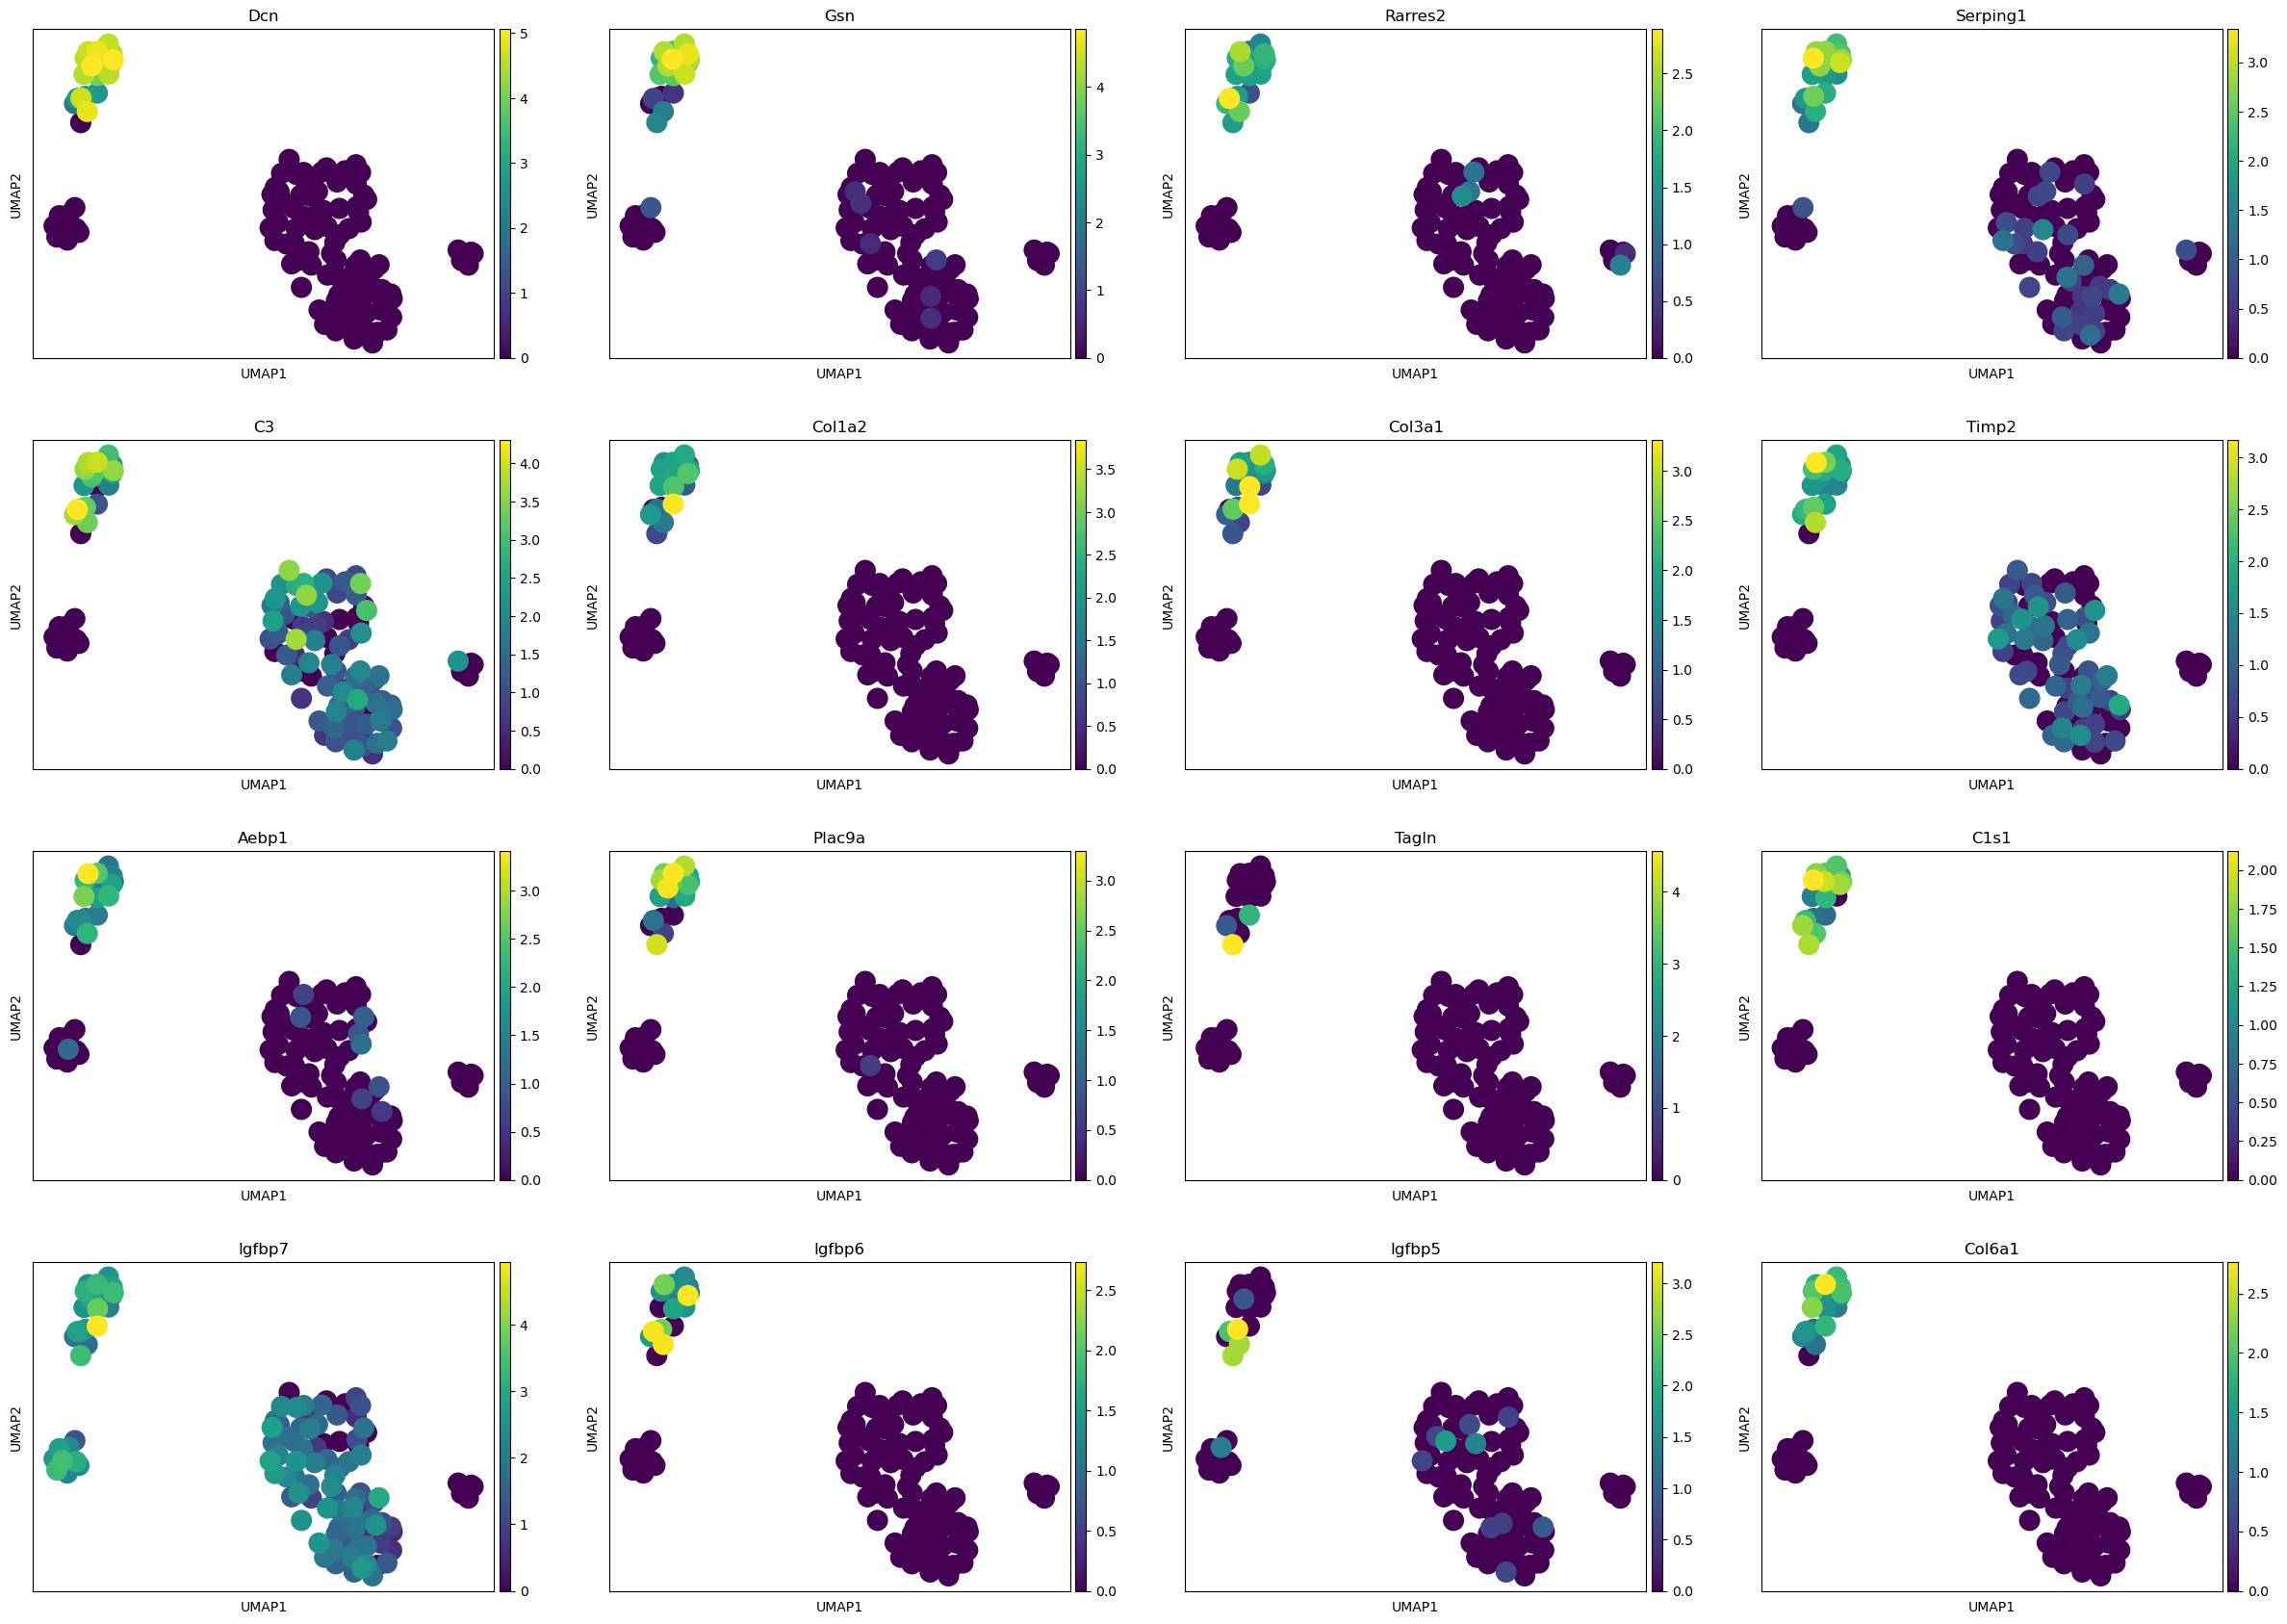

Cluster 4


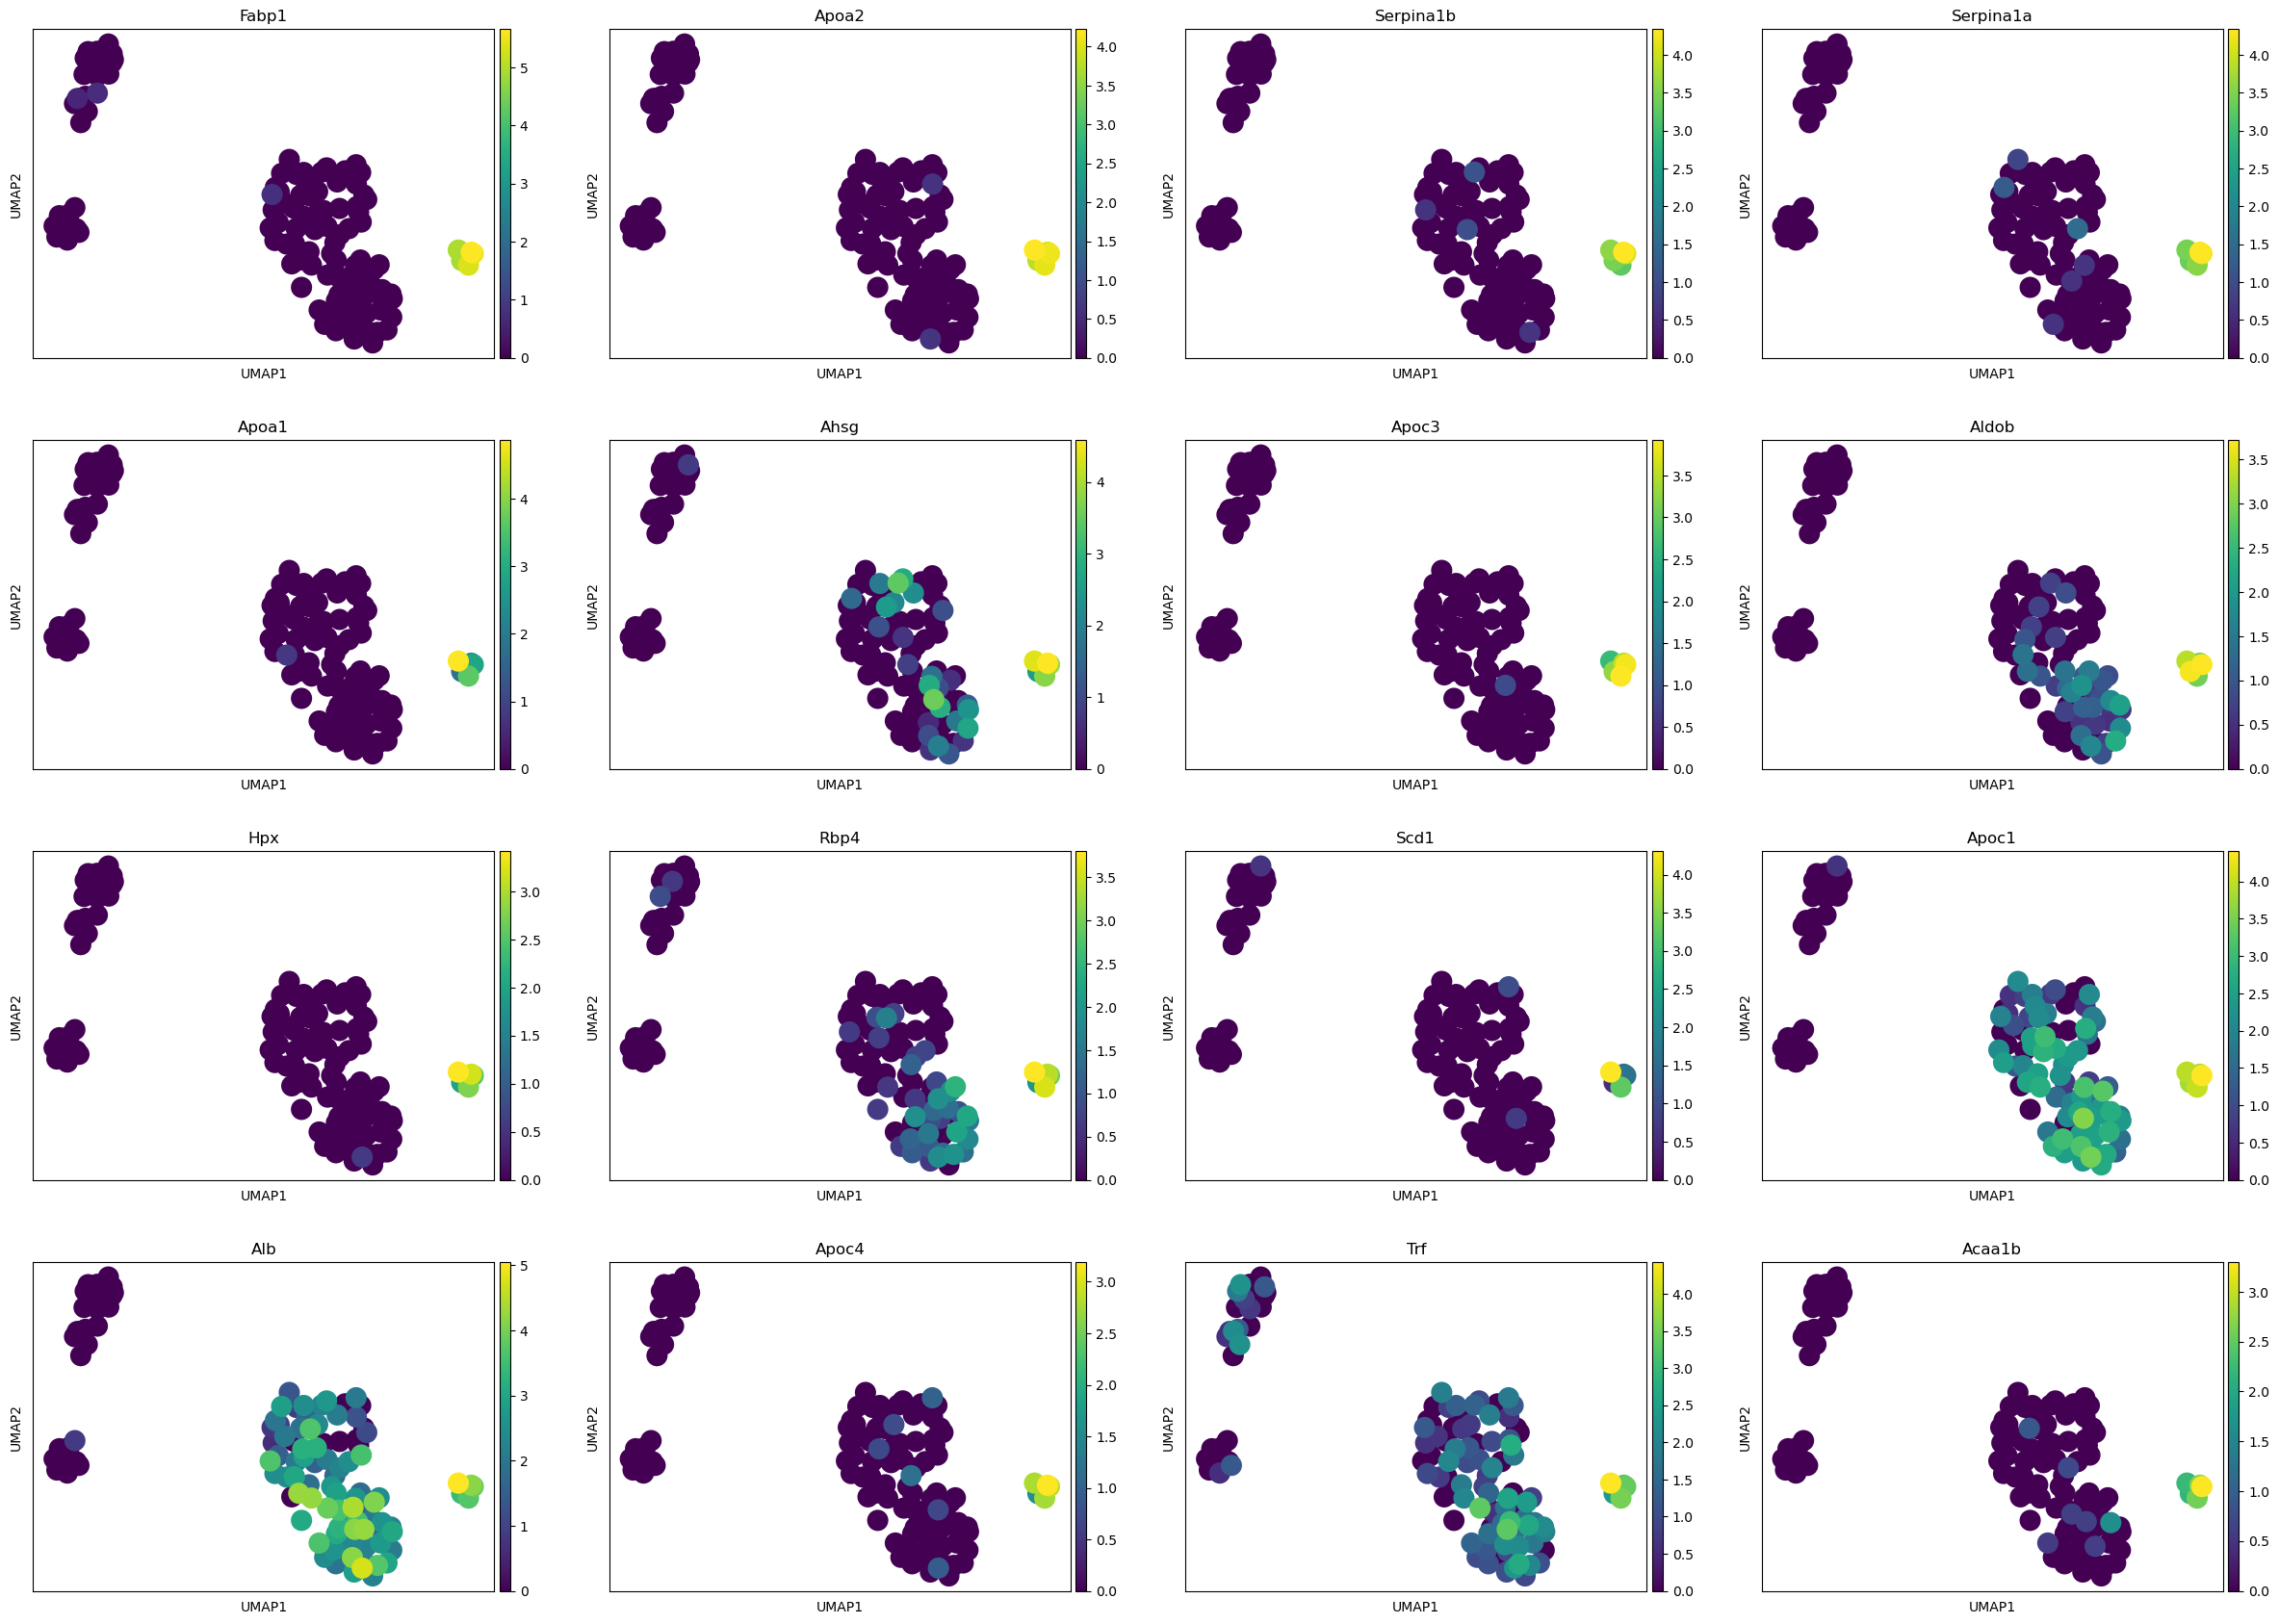

Cluster Cholangiocytes


ValueError: no field of name Cholangiocytes

In [194]:
#print(('fineClusters' not in adata.obs))
for cluster in np.unique(fineData.obs['leiden']):
    print(f"Cluster {cluster}")
    sc.pl.umap(fineData, color=fineData.uns['rank_genes_groups']['names'][str(cluster)][:16])

newClusterNames = ['B Cells','B Cells2','Naive CD8+','Naive CD4+','CTLs','5','6','Y-Delta T Cells', '8', '9']
#lymphAdata.rename_categories('leiden', newClusterNames)


['pDCs', 'B Cells', 'Kupffer Cells', 'cDC2s', 'Monocytes', 'TEM', 'Peri. Macs', 'Naive CD8+', 'Naive CD8+', 'Naive CD8+', 'Naive CD8+', 'cDC2s', 'Trans. Mono', 'cDC1s', 'cDC2s', 'TEM', 'B Cells', 'CV & Cap. Macs', 'Peri. Macs', 'cDC2s', 'NK Cells', 'Pat. Mono', 'NK Cells', 'Monocytes', 'Kupffer Cells', 'B Cells', 'cDC1s', 'Naive CD8+', 'Naive CD8+', 'Kupffer Cells', 'Trans. Mono', 'Cancer', 'Trans. Mono', 'Kupffer Cells', 'Naive CD4+', 'B Cells', 'Naive CD4+', 'Kupffer Cells', 'Neutrophils', 'CV & Cap. Macs', 'Pat. Mono', 'Kupffer Cells', 'NK Cells', 'Cancer', 'LAMs', 'Stellate Cells', 'cDC2s', 'TEM', 'Monocytes', 'cDC2s', 'ILC1s', 'Naive CD4+', 'B Cells', 'Naive CD4+', 'NK Cells', 'cDC2s', 'Neutrophils', 'Monocytes', 'CV & Cap. Macs', 'Naive CD4+', 'Monocytes', 'CV & Cap. Macs', 'Monocytes', 'Naive CD8+', 'Naive CD4+', 'cDC2s', 'B Cells', 'TEM', 'Monocytes', 'B Cells', 'B Cells', 'TEM', 'Kupffer Cells', 'CTLs', 'LAMs', 'CV & Cap. Macs', 'NK Cells', 'LAMs', 'Naive CD8+', 'pDCs', 'Y-Del

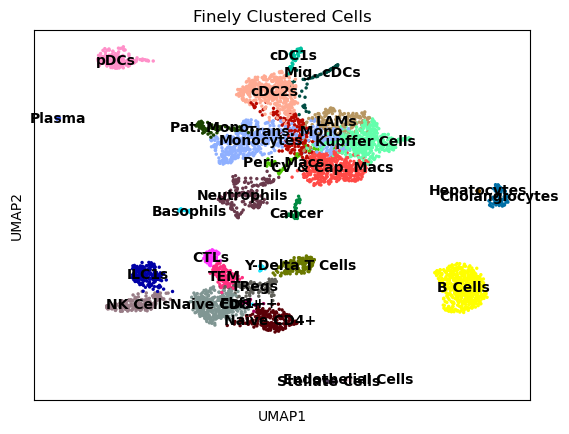

In [199]:
### Add fine-tuning to adata
if 'fineClusters' not in adata.obs:
    adata.obs['fineClusters'] = adata.obs['coarseClusters']
newFineClusters=[]
for cell in adata.obs.index:
    if cell in fineData.obs.index:
        newFineClusters.append(fineData.obs['leiden'][cell])
    else:
        newFineClusters.append(adata.obs['fineClusters'][cell]) 
print(newFineClusters)
adata.obs['fineClusters']=newFineClusters
sc.pl.umap(adata, color=['fineClusters'], title='Finely Clustered Cells', legend_loc='on data')


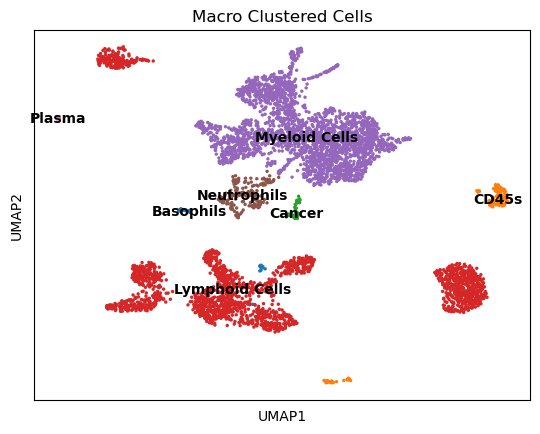

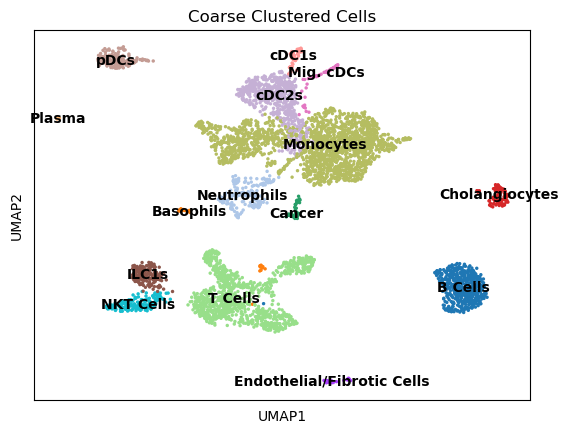

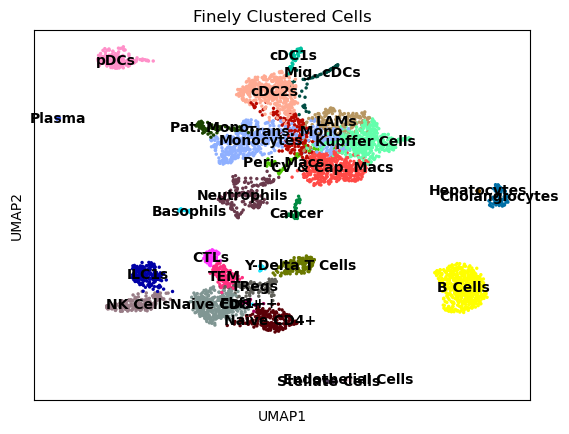

In [201]:
sc.pl.umap(adata, color=['macroClusters'], title='Macro Clustered Cells', legend_loc='on data')
sc.pl.umap(adata, color=['coarseClusters'], title='Coarse Clustered Cells', legend_loc='on data')
sc.pl.umap(adata, color=['fineClusters'], title='Finely Clustered Cells', legend_loc='on data')

In [202]:
adata.write_h5ad(pathPrefix + treatment[whichTreatment] +'.h5ad')